#**Archisha Sinha**
##Topic: Mario AI Model - Reinforcement Learning
##Domain: Intelligent Systems

##Aim:  To explore and build an Intelligent Mario Bot using Reinforcement Learning


##SUPER MARIO EXPERIMENT

###In the context of training an agent to play Mario:

- The agent is Mario.
- The environment is Mario's world — it contains enemies, obstacles, and powerups, such as tubes, mushrooms, etc.
- The action is what Mario (the agent) decides to do.
- The action space is all of the possible actions that Mario can carry out: running right, jumping right, running left, and jumping left.
- In this case, I have restricted Mario to right movement only, for faster training.
- The state includes several things: Mario’s position, where the obstacles, powerups, and enemies are, Mario’s current score, and the direction in which everything is moving in.
- The state space is a set of all of the possible states in the environment.
- The reward is the feedback from the environment to the agent, which drives Mario to learn and change his future action.
- The return is a cumulative reward over the course of several play-throughs or episodes.
- The quality of action in a state is the expected return for the given state and action.


###The steps to create the environment and train the model are as follows:
Step 1: Set up the Environment

Step 2: Preprocess Environment

Step 3: Train the Model


##REINFORCEMENT LEARNING

- In reinforcement learning, a policy is a function that takes in an observation of the environment and returns an action to take.
- The Proximal Policy Optimization (PPO) algorithm is a popular method for training policies in RL.
- PPO can be used to learn both continuous and discrete policies.
- In PPO, there are two main types of policies: the actor and the critic.
- The actor is responsible for selecting actions based on the current state of the environment, while the critic estimates the value of being in a certain state.
- The PPO algorithm trains the actor and critic policies by iteratively collecting experiences from the environment and updating the policies based on those experiences.
- During each iteration, the actor policy is trained to maximize the expected reward, while the critic policy is trained to accurately estimate the value of states.


Task 1:

1.  Explore the link on how to build an AI model for playing Super Mario:

https://python.plainenglish.io/build-an-ai-model-to-play-super-mario-7607b1ec1e17

2. Explore the PPO reinforcement learning algorithm explained in the link below:

https://openai.com/research/openai-baselines-ppo




---



#1.

install our dependencies using a simple pip install

In [ ]:
!pip install gym_super_mario_bros nes_py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.7 MB/s eta 0:00:00
  Created wheel for nes_py: filename=nes_py-8.2.1-cp310-cp310-linux_x86_64.whl size=535719 sha256=25ba28abf913aea22540dff3e4b1959a33bdac59726bbd0f8964de5fa9453e6d
  Stored in directory: /root/.cache/pip/wheels/34/a7/d5/9aa14b15df740a53d41f702e4c795731b6c4da7925deb8476c
Successfully built nes_py


import the dependencies we just exported

In [ ]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

simplify the environment for our AI, as we want it to learn to play the game with very little hassle. We are going to do this by simplifying the number of actions that Mario can do.

In [ ]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

Now we want to set up our game, turning our game on

In [ ]:
env = gym_super_mario_bros.make('SuperMarioBros2-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment SuperMarioBros2-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


We have different versions of Super Mario, we have picked the ‘SuperMarioBros2-v0’.

So now we want to go ahead and play the game:

In [ ]:
done = True
for frame in range(100000):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()
env.close()

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


NoSuchDisplayException: Cannot connect to "None"

#2.

##Proximal Policy Optimization (PPO)

With supervised learning, we can easily implement the cost function, run gradient descent on it, and be very confident that we’ll get excellent results with relatively little hyperparameter tuning. The route to success in reinforcement learning isn’t as obvious—the algorithms have many moving parts that are hard to debug, and they require substantial effort in tuning in order to get good results. PPO strikes a balance between ease of implementation, sample complexity, and ease of tuning, trying to compute an update at each step that minimizes the cost function while ensuring the deviation from the previous policy is relatively small.

We’ve previously detailed a variant of PPO that uses an adaptive KL penalty to control the change of the policy at each iteration. The new variant uses a novel objective function not typically found in other algorithms:

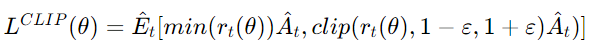

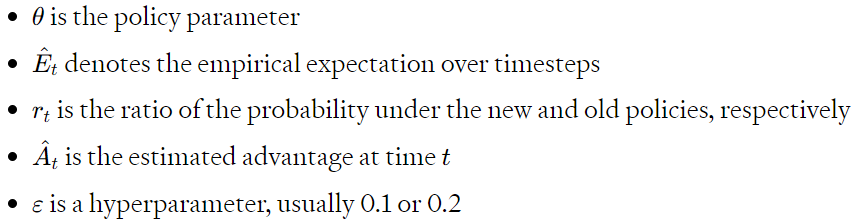

Task 2:
1. Set up a simple environment for Mario by choosing some basic actions.
2. Initialize the environment.
3. Preprocess the environment.
4. Train the model by using a reinforcement learning model.



---




#1.
Select a set of basic actions for Mario, such as:
- running right,
- jumping right,
- running left,
- jumping left

In [ ]:
mario_actions= ['run_right', 'jump_right', 'run_left', 'jump_left']

#2.
Initialize the environment:
1. state_space = 10  # Example: Mario's position, obstacles, powerups, enemies, etc.
2. action_space = len(mario_actions)
3. game_world = np.zeros((10, 10))  # Example: 10x10 grid for the game world
4. mario_position = (0, 0)  # Initial position of Mario
5. enemies = [(2, 2), (4, 4)]  # Example: Enemy positions
6. obstacles = [(1, 3), (3, 5)]  # Example: Obstacle positions
7. powerups = [(0, 5), (2, 8)]  # Example: Powerup positions

In [ ]:
import numpy as np

In [ ]:
# Define the environment for Mario
state_space = 10  # Example: Mario's position, obstacles, powerups, enemies, etc.
action_space = len(mario_actions)
game_world = np.zeros((10, 10))  # Example: 10x10 grid for the game world
mario_position = (0, 0)  # Initial position of Mario
enemies = [(2, 2), (4, 4)]  # Example: Enemy positions
obstacles = [(1, 3), (3, 5)]  # Example: Obstacle positions
powerups = [(0, 5), (2, 8)]  # Example: Powerup positions

In [ ]:
def get_state():
    state = np.zeros(state_space)
    state[0] = mario_position[0]
    state[1] = mario_position[1]
    # Add more state information based on obstacles, enemies, powerups, etc.
    return state

In [ ]:
def step(action):
    # Implement the logic for Mario's action in the environment
    reward = 0  # Define the reward based on Mario's action
    done = False  # Define the termination condition
    # Update the environment based on the action
    return get_state(), reward, done


In [ ]:
# Initialize the Mario environment
initial_state = get_state()

In [ ]:
action = np.random.choice(action_space)  # Random action selection
next_state, reward, done = step(action)

In [ ]:
print("Initial State:", initial_state)
print("Action taken:", mario_actions[action])
print("Next State:", next_state)
print("Reward received:", reward)
print("Episode Done:", done)

Initial State: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Action taken: run_right
Next State: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Reward received: 0
Episode Done: False


#3.
Preprocess the environment

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#environment data
environment_data = np.array([[1, 5, 10],
                              [2, 6, 20],
                              [3, 7, 30]])

In [ ]:
# Preprocess the environment data using Min-Max scaling
def preprocess_environment_data(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

In [ ]:
# Preprocess the environment data
preprocessed_data = preprocess_environment_data(environment_data)

In [ ]:
# Display the original and preprocessed data
print("Original Environment Data:")
print(environment_data)
print("\nPreprocessed Environment Data:")
print(preprocessed_data)

Original Environment Data:
[[ 1  5 10]
 [ 2  6 20]
 [ 3  7 30]]

Preprocessed Environment Data:
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#4.
Train the model by using a reinforcement learning model

In [ ]:
!pip install tensorflow==2.11.0
import tensorflow as tf
from tensorflow.compat.v1.keras.models import Sequential
from tensorflow.compat.v1.keras.layers import Dense
from tensorflow.compat.v1.keras.optimizers import Adam
from tensorflow.compat.v1.keras.distributions import Categorical

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 50.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Att

ImportError: cannot import name 'dtensor_api' from 'keras.dtensor' (/usr/local/lib/python3.10/dist-packages/keras/dtensor/__init__.py)

In [ ]:
# Define the PPO training loop
def train_PPO():
    # Define actor and critic models
    actor = Sequential([
        Dense(64, input_shape=(state_space,), activation='relu'),
        Dense(action_space, activation='softmax')
    ])

    critic = Sequential([
        Dense(64, input_shape=(state_space,), activation='relu'),
        Dense(1)
    ])

    actor.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')
    critic.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error')

    # Training loop
    num_episodes = 1000
    for episode in range(num_episodes):
        state = get_state()
        done = False
        episode_states, episode_actions, episode_rewards = [], [], []
        while not done:
            action = np.random.choice(action_space)  # Random action selection
            next_state, reward, done = step(action)
            episode_states.append(state)
            episode_actions.append(action)
            episode_rewards.append(reward)
            state = next_state

        # Train the model using PPO
        # Implement PPO training logic here

        # Define the PPO training loop
def train_PPO():
    # Define actor and critic models
    actor = Sequential([
        Dense(64, input_shape=(state_space,), activation='relu'),
        Dense(action_space, activation='softmax')
    ])

    critic = Sequential([
        Dense(64, input_shape=(state_space,), activation='relu'),
        Dense(1)
    ])

    actor.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy')
    critic.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error')

    # Hyperparameters
    gamma = 0.99  # Discount factor
    epsilon = 0.2  # Clipping parameter
    num_epochs = 10

    # Training loop
    num_episodes = 1000
    for episode in range(num_episodes):
        state = get_state()
        done = False
        episode_states, episode_actions, episode_rewards = [], [], []

        while not done:
            action_prob = actor.predict(np.array([state]))[0]
            action_dist = distributions.Categorical(probs=action_prob)
            action = action_dist.sample()

            next_state, reward, done = step(action)

            episode_states.append(state)
            episode_actions.append(action)
            episode_rewards.append(reward)

            state = next_state

        # Compute advantages
        discounted_rewards = []
        advantage_values = []
        advantage_sum = 0

        for t in range(len(episode_rewards)):
            Gt = 0
            pw = 0

            for r in episode_rewards[t:]:
                Gt += r * (gamma ** pw)
                pw += 1

            discounted_rewards.append(Gt)

        discounted_rewards -= np.mean(discounted_rewards)
        discounted_rewards /= np.std(discounted_rewards)

        for t in range(len(episode_states)):
            state_value = critic.predict(np.array([episode_states[t]]))[0][0]
            next_state_value = critic.predict(np.array([episode_states[t+1]]))[0][0] if t < len(episode_states) - 1 else 0

            td_target = episode_rewards[t] + gamma * next_state_value
            advantage_values.append(td_target - state_value)

        # Update actor and critic models using PPO
        for _ in range(num_epochs):
            with tf.GradientTape() as tape:
                action_prob = actor(np.array(episode_states))
                action_dist = distributions.Categorical(probs=action_prob)
                log_probs = action_dist.log_prob(episode_actions)

                ratios = tf.exp(log_probs - old_log_probs)

                actor_loss = -tf.reduce_mean(tf.minimum(ratios * advantage_values,
                                                        tf.clip_by_value(ratios, 1-epsilon, 1+epsilon) * advantage_values))

                critic_loss = tf.reduce_mean(tf.square(discounted_rewards - critic(np.array(episode_states))))

                total_loss = actor_loss + critic_loss

            actor_gradients = tape.gradient(total_loss, actor.trainable_variables)
            critic_gradients = tape.gradient(total_loss, critic.trainable_variables)

            actor.optimizer.apply_gradients(zip(actor_gradients, actor.trainable_variables))
            critic.optimizer.apply_gradients(zip(critic_gradients, critic.trainable_variables))

In [ ]:
# Main function to run the training
if __name__ == "__main__":
    # Preprocess the environment data
    environment_data = np.array([[1, 5, 10], [2, 6, 20], [3, 7, 30]])
    preprocessed_data = preprocess_environment_data(environment_data)

    # Train the model using PPO
    train_PPO()

NameError: name 'Sequential' is not defined

##Conclusion:
The code establishes a Mario game environment for reinforcement learning. It defines actions, initializes the game world, preprocesses data, and trains a PPO model. This structured approach sets the foundation for enhancing Mario's decision-making in the game.